# emcee mcmc Introduction
## using model found in arXiv:1005:2459[hep-ph] (section 3)
found at http://dfm.io/emcee/current/

## Fitting a Model to Data
http://dfm.io/emcee/current/user/line/

/home/jho/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in power


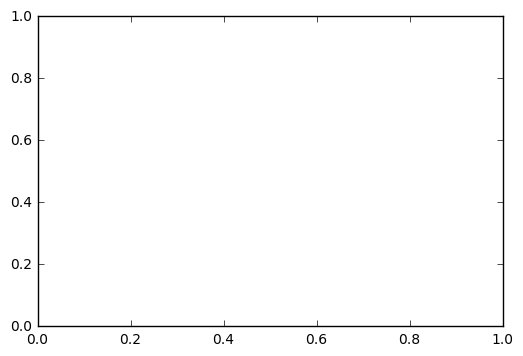

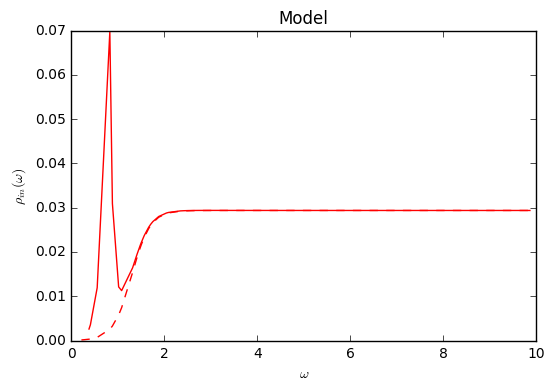

NameError: name 'M' is not defined

In [43]:
# We're going to generate a synthetic dataset from a given model, and then fit to the data.
# as per section 3.1 of Gubler & Oka

# import necessary packages
import numpy as np
import emcee
import matplotlib.pyplot as pl
import scipy.optimize as op
import scipy.integrate as integrate
import corner

# Choose the "true" parameters.
# equation (3.2)

mrho = 0.77 # GeV; mass of rho meson
mpi = 0.14 # GeV; mass of pion
om0 = 1.3 # GeV; 
d = 0.2 # GeV; delta
g = 5.45 # g_{\rho \pi \pi} coupling
alpha = 0.5 # strong coupling constant
fP = mrho / g

# Generate some synthetic data from the model.
N = 100
om = np.sort(10*np.random.rand(N))
#yerr = 0.1+0.5*np.random.rand(N)

Gamma_rho = (g**2 * mrho/ (48 * np.pi))*(1 - 4*mpi**2 / om**2)**(3.0/2.0)*np.heaviside(om, 2*mpi) # Model Spectral Function, equation (3.1)
rho_in = (2*fP**2/np.pi)*(Gamma_rho*mrho/((om**2-mrho**2)**2 + Gamma_rho**2*mrho**2)) + (1/(4*np.pi**2))*(1 + alpha / np.pi) * (1 / (1 + np.exp((om0-om)/d))) # Model Spectral Function, equation (3.1)
mom = (1/(4*np.pi**2))*(1 + alpha / np.pi) * (1 / (1 + np.exp((om0-om)/d))) # Default model, equation 3.3

# integrate spectral function to find G_{mock}
from scipy.integrate import simps
def integrand(om, M):
    return (2.0/M**2)*np.exp(-om**2/M)*om*rho_in
def G_OPE(M):
    I = quad(integrand, 0, np.inf, args=M)[0]
    return I
    

# visualize synthetic data
# plot model
fig, axes = pl.subplots()
axes.plot(om, rho_in, 'r')
axes.plot(om, mom, 'r--')
axes.set_xlabel(r'$\omega$')
axes.set_ylabel(r'$\rho_{in}(\omega)$')
axes.set_title('Model')
pl.show()                                                                                                                                

fig, axes = pl.subplots()
axes.plot(M, G_OPE, 'r')
axes.set_xlabel(r'$M$')
axes.set_ylabel(r'$G_{mock}(M)$')
axes.set_title(r'$G_{mock}$')
pl.show()   

In [46]:
# https://stackoverflow.com/questions/40960968/python-plotting-an-integral

# def H(z, omega_m, H_0=70):
#     omega_lambda = 1 - omega_m
#     z_prime = ((1 + z) ** 3)
#     wurzel = np.sqrt(omega_m * z_prime + omega_lambda)

#     return H_0 * wurzel


# def H_inv(z, omega_m, H_0=70):
#    return 1 / (H(z, omega_m, H_0=70))

# I need an array of G_OPE(M) for given values of M between 0 and 3.
def integrand(om, M):
    return (2.0/M**2)*np.exp(-om**2/M)*om*rho_in
def G_OPE(M)
    for M in np.linspace(0, 3, 300):
        I = simps(integrand(om, M),x=None, 0, np.inf)[0]
    yield I

# M0 = 0
# Mf = 1
# Ms = np.linspace(M0, Mf, 100)

# fig, ax = pl.subplots(nrows=1,ncols=1, figsize=(16,9))

# for omega_m in np.linspace(0, 1, 10):
#     d_Ls = np.linspace(M0, Mf, 100)
#     for index in range(Ms.size):
#         d_Ls[index] = G_OPE(Ms[index])
#     ax.plot(Ms,d_Ls, label='$\Omega$ = {:.2f}'.format(omega_m))
# ax.legend(loc='best')
# pl.show()

SyntaxError: invalid syntax (<ipython-input-46-e90602868cb1>, line 17)

In [45]:
np.fromiter(G_OPE(3), dtype=float)

/home/jho/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in double_scalars
/home/jho/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
/home/jho/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in multiply


ValueError: If given, shape of x must be 1-d or the same as y.

In [ ]:
                                                                                                                                
# results from Linear least squares
#A = np.vstack((np.ones_like(x), x)).T
#C = np.diag(yerr * yerr)
#cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
#b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

# results from Maximum Likelihood Estimation
# define (log) likelihood function
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))
# use scipy to maximize
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]



# plot results of least squares regression and compare with model
fig, axes = pl.subplots()
axes.plot(x, m_true*x+b_true, 'r')
axes.plot(x, m_ls*x+b_ls, 'r--')
axes.errorbar(x, y, yerr=yerr, fmt='o', markersize=2)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Model vs. Linear Regression')
pl.show()

# plot results of Maximum Likelihood and compare with model and least squares regression
fig, axes = pl.subplots()
axes.plot(x, m_true*x+b_true, 'r')
axes.plot(x, m_ls*x+b_ls, 'r--')
axes.plot(x, m_ml*x+b_ml, 'g')
axes.errorbar(x, y, yerr=yerr, fmt='o', markersize=2)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Maximum Likelihood vs. Linear Regression and Model')
pl.show()

In [ ]:
[[m_true, b_true, f_true],[m_ls, b_ls, 0],[m_ml, b_ml, lnf_ml]]

## Marginalization and Uncertainty estimation

In [ ]:
# define uniform priors for m, b, and lnf
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf
# define full log-probability function
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

# setup emcee sampling
ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))
res = sampler.run_mcmc(pos, 500)

In [ ]:
pl.plot(res[0])

pl.show()

In [ ]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

In [ ]:
pl.plot(samples)
pl.show()

## Results

In [ ]:
fig = corner.corner(samples, labels=["$m$", "$b$", "$\ln\,f$"],
                      truths=[m_true, b_true, np.log(f_true)])
#fig.savefig("triangle.png")
pl.show()

In [ ]:
xl = np.array([0, 10])
for m, b, lnf in samples[np.random.randint(len(samples), size=100)]:
    pl.plot(xl, m*xl+b, color="k", alpha=0.1)
pl.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
pl.errorbar(x, y, yerr=yerr, fmt=".k")
pl.show()

samples[:, 2] = np.exp(samples[:, 2])
m_mcmc, b_mcmc, f_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))

print(m_mcmc[0], b_mcmc[0], f_mcmc[0])
print(m_true, b_true, f_true)

In [10]:
G_OPE(1)

TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
np.version.version